In [1]:
import telegram
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import seaborn as sns
from datetime import date
import io
import logging
import pandas as pd
import pandahouse
from read_db.CH import Getch
import os

In [2]:
# updates = bot.getUpdates()
# print(updates[-1])

bot = telegram.Bot(token='***')
chat_id = 187545653
# -674009613

In [23]:
# TEST Send message

msg = "Hello, it's the second message from PY Bot"
bot.sendMessage(chat_id = chat_id, text = msg)

# TEST Send image

x = np.arange(1, 10, 1)
y = np.random.choice(5, len(x))
sns.lineplot(x, y)
plt.title('test plot')
plot_object = io.BytesIO()
plt.savefig(plot_object)
plot_object.seek(0)
plot_object.name = 'test_plot.png'
plt.close()
bot.sendPhoto(chat_id=chat_id, photo=plot_object)

# TEST Send file

data = Getch('select * from simulator.feed_actions where toDate(time) = today() limit 100').df
file_object = io.StringIO()
data.to_csv(file_object)
file_object.name = 'test_file.csv'
file_object.seek(0)
bot.sendDocument(chat_id=chat_id, document=file_object)

## Report for news feed

In [3]:
stat_7days = Getch("select toDate(time) as date, \
uniqExact(user_id) as user_cnt, \
countIf(user_id, action='view') as view_cnt, \
countIf(user_id, action='like') as like_cnt, \
countIf(user_id, action='like')/countIf(user_id, action='view')*100 as ctr \
from simulator_20211220.feed_actions \
where toDate(time) between today()-7 and today()-1 \
group by toDate(time) \
order by toDate(time)").df

stat_7days

,date,user_cnt,view_cnt,like_cnt,ctr
0,2022-01-05,16407,720220,147586,20.491794
1,2022-01-06,10933,484386,100744,20.798289
2,2022-01-07,17653,728911,149857,20.559026
3,2022-01-08,18007,677585,134925,19.912631
4,2022-01-09,18324,571965,117495,20.542341
5,2022-01-10,18887,489772,95539,19.506832
6,2022-01-11,18368,493685,100513,20.359744


In [11]:
stat_7days['date'].values[0]

numpy.datetime64('2022-01-04T00:00:00.000000000')

In [6]:
msg = 'News feed report for: <b>' + pd.to_datetime(str(stat_7days['date'].values[-1])).strftime("%m/%d/%Y") + '</b>' + '\n' + '\n' + \
'<b>DAU</b> = ' + str(stat_7days['user_cnt'].values[-1]) + '\n' + \
'<b>CTR</b> = ' + str(round(stat_7days['ctr'].values[-1],2))+ '%' + '\n' + \
'<b>Views</b> = ' + str(stat_7days['view_cnt'].values[-1]) + '\n' + \
'<b>Likes</b> = ' + str(stat_7days['like_cnt'].values[-1]) + '\n' + '\n' + \
'The full version of the report can be found <a href="http://superset.lab.karpov.courses/r/400">here</a>.'

bot.sendMessage(chat_id = chat_id, text = msg, parse_mode=telegram.ParseMode.HTML)
# msg

In [5]:
# file

# file_object = io.StringIO()
# dau_7days.to_csv(file_object)
# file_object.name = 'dau_7days.csv'
# file_object.seek(0)
# bot.sendDocument(chat_id=chat_id, document=file_object)

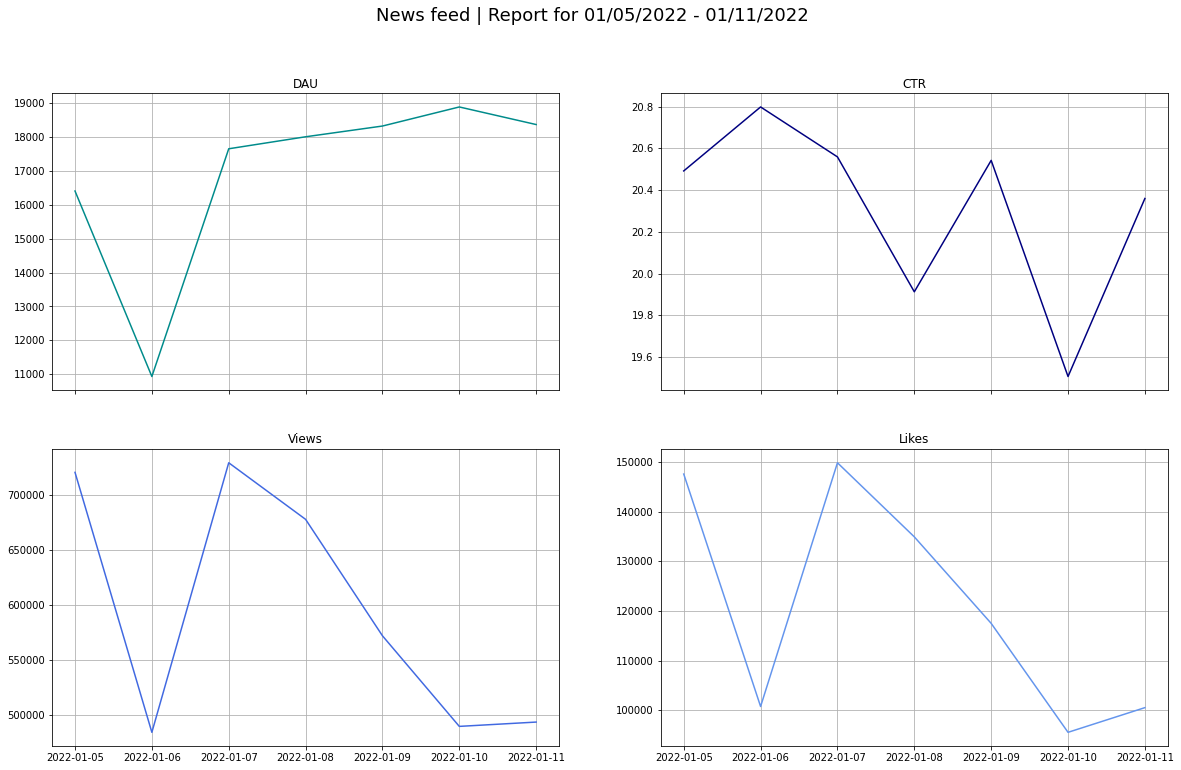

In [15]:
fig = plt.figure(figsize=(20, 12))
fig.suptitle('News feed | Report for ' + pd.to_datetime(str(stat_7days['date'].values[0])).strftime("%m/%d/%Y") + \
             ' - ' + pd.to_datetime(str(stat_7days['date'].values[-1])).strftime("%m/%d/%Y"),  fontsize=18)

ax1 = fig.add_subplot(2,2,1)
ax1.set_title('DAU')
ax1.grid(True)
ax1.plot(stat_7days['date'], stat_7days['user_cnt'], 'darkcyan')
plt.setp(ax1.get_xticklabels(), visible=False)
# ax1.tick_params(axis='both', which='both', length=0)

ax2 = fig.add_subplot(2,2,2)
ax2.set_title('CTR')
ax2.grid(True)
ax2.plot(stat_7days['date'], stat_7days['ctr'], 'navy')
plt.setp(ax2.get_xticklabels(), visible=False)
# ax2.tick_params(axis='both', which='both', length=0)

ax3 = fig.add_subplot(2,2,3)
ax3.set_title('Views')
ax3.grid(True)
ax3.plot(stat_7days['date'], stat_7days['view_cnt'], 'royalblue')

ax4 = fig.add_subplot(2,2,4)
ax4.set_title('Likes')
ax4.grid(True)
ax4.plot(stat_7days['date'], stat_7days['like_cnt'], 'cornflowerblue')


# for ax in fig.get_axes():
#     ax.set(xlabel='date', ylabel='value')
    # ax.label_outer()


plot_object = io.BytesIO()
fig.savefig(plot_object)
plot_object.seek(0)
plot_object.name = 'full_figure.png'
plt.show()
plt.close()

In [16]:
caption = 'News feed | Report for ' + pd.to_datetime(str(stat_7days['date'].values[0])).strftime("%m/%d/%Y") + \
             ' - ' + pd.to_datetime(str(stat_7days['date'].values[-1])).strftime("%m/%d/%Y")

bot.sendPhoto(chat_id=chat_id, photo=plot_object, caption=caption)

## General report for news feed and messenger

In [ ]:
# fa_only = Getch("SELECT date_trunc('day', fa.time) as day, uniqExact(fa.user_id) as fa_user_cnt \
# from simulator_20211220.feed_actions as fa \
# left JOIN \
# simulator_20211220.message_actions as ma \
# on ma.user_id=fa.user_id \
# where ma.user_id=0 \
# group by date_trunc('day', fa.time) \
# order by date_trunc('day', fa.time)").df

# ma_only = Getch("SELECT date_trunc('day', ma.time) as day, \
# count(distinct ma.user_id) as ma_user_cnt \
# from simulator_20211220.feed_actions as fa \
# right JOIN \
# simulator_20211220.message_actions as ma \
# on ma.user_id=fa.user_id \
# where fa.user_id=0 \
# group by date_trunc('day', ma.time) \
# order by date_trunc('day', ma.time)").df

# fa_ma = Getch("SELECT date_trunc('day', ma.time) as day, \
# count(distinct fa.user_id) as active_user_cnt \
# from simulator_20211220.message_actions ma \
# JOIN \
# simulator_20211220.feed_actions fa \
# on ma.user_id=fa.user_id \
# group by date_trunc('day', ma.time) \
# order by date_trunc('day', ma.time)").df

In [17]:
service_users = Getch("SELECT uniqExactIf(fa.user_id, ma.user_id=0) as fa_user_cnt, \
uniqExactIf(ma.user_id, fa.user_id=0) as ma_user_cnt, \
uniqExactIf(ma.user_id, and(fa.user_id>0, ma.user_id>0)) as active_user_cnt \
from simulator_20211220.feed_actions as fa \
full JOIN \
simulator_20211220.message_actions as ma \
on ma.user_id=fa.user_id").df

service_users

,fa_user_cnt,ma_user_cnt,active_user_cnt
0,65656,28064,43355


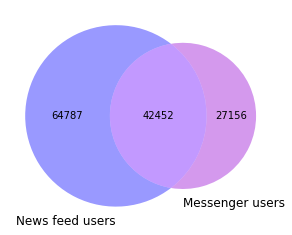

In [14]:
# Use the venn2 function
venn2(subsets = (service_users['fa_user_cnt'][0], service_users['ma_user_cnt'][0], service_users['active_user_cnt'][0]), 
      set_labels = ('News feed users', 'Messenger users'),
      set_colors=('blue', 'darkviolet'))
plt.show()

In [18]:
avg_scores = Getch("select \
    fa.date,  \
    fa_user_cnt, \
    ma_user_cnt, \
    view_cnt, \
    like_cnt, \
    message_cnt \
from ( \
select toDate(time) as date,  \
    uniqExact(user_id) as fa_user_cnt,  \
    countIf(user_id, action='view') as view_cnt, \
    countIf(user_id, action='like') as like_cnt \
from simulator_20211220.feed_actions \
group by toDate(time)) as fa \
left join (select  \
    toDate(time) as date,  \
    uniqExact(user_id) as ma_user_cnt,  \
    count(user_id) as message_cnt \
    from simulator_20211220.message_actions \
    group by toDate(time) \
) as ma \
on fa.date=ma.date").df 

avg_scores['views_avg'] = round(avg_scores['view_cnt']/avg_scores['fa_user_cnt'],2)
avg_scores['likes_avg'] = round(avg_scores['like_cnt']/avg_scores['fa_user_cnt'],2)
avg_scores['messages_avg'] = round(avg_scores['message_cnt']/avg_scores['ma_user_cnt'],2)

avg_scores[-10:]

,date,fa_user_cnt,ma_user_cnt,view_cnt,like_cnt,message_cnt,views_avg,likes_avg,messages_avg
46,2022-01-03,16788,5672,726399,156519,12475,43.27,9.32,2.20
47,2022-01-04,16756,5673,715651,153015,12431,42.71,9.13,2.19
48,2022-01-05,16407,5742,720220,147586,12409,43.90,9.00,2.16
49,2022-01-06,10933,5854,484386,100744,12516,44.30,9.21,2.14
50,2022-01-07,17653,5905,728911,149857,12559,41.29,8.49,2.13
51,2022-01-08,18007,6082,677585,134925,12529,37.63,7.49,2.06
52,2022-01-09,18324,6025,571965,117495,12442,31.21,6.41,2.07
53,2022-01-10,18887,6108,489772,95539,12427,25.93,5.06,2.03
54,2022-01-11,18368,6154,493685,100513,12452,26.88,5.47,2.02
55,2022-01-12,17882,6077,452007,89182,12270,25.28,4.99,2.02


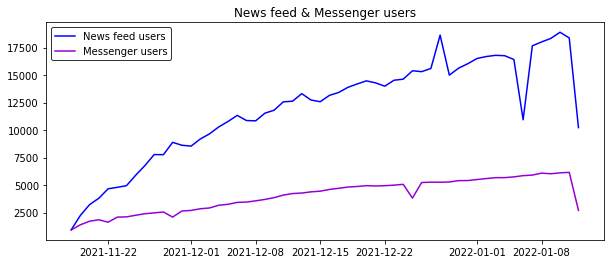

In [15]:
fig = plt.figure(figsize=(10, 4))

plt.plot(avg_scores['date'], avg_scores['fa_user_cnt'], color='blue', label='News feed users')
plt.plot(avg_scores['date'], avg_scores['ma_user_cnt'], color='darkviolet', label='Messenger users')
plt.title("News feed & Messenger users")

plt.legend(edgecolor=(0, 0, 0, 1.), facecolor=(1, 1, 1, 0.1))
plt.show()

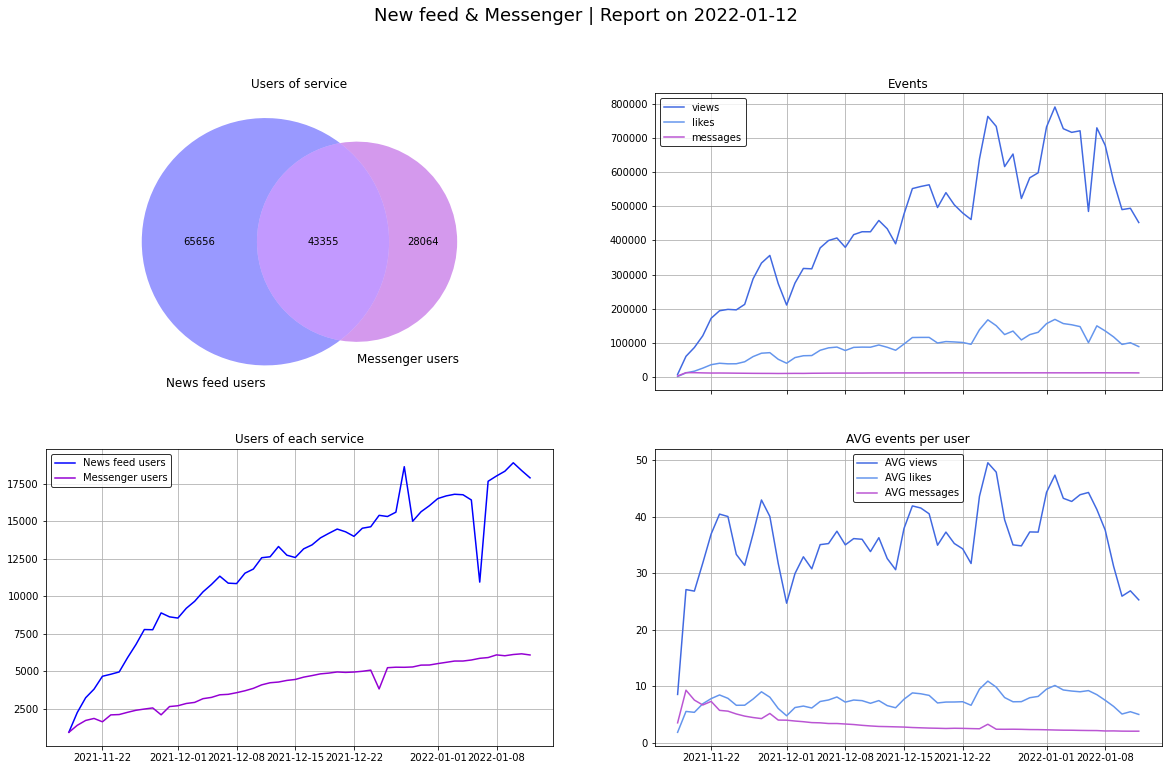

In [19]:
fig = plt.figure(figsize=(20, 12))
fig.suptitle('New feed & Messenger | Report on ' + date.today().strftime("%Y-%m-%d"), fontsize=18)


ax1 = fig.add_subplot(2,2,1)
ax1.set_title('Users of service')
venn2(subsets = (service_users['fa_user_cnt'][0], service_users['ma_user_cnt'][0], service_users['active_user_cnt'][0]), 
      set_labels = ('News feed users', 'Messenger users'),
      set_colors=('blue', 'darkviolet'))

ax2 = fig.add_subplot(2,2,2)
ax2.set_title('Events')
ax2.set_facecolor('white')
ax2.grid(True)
ax2.plot(avg_scores['date'], avg_scores['view_cnt'], color='royalblue', label='views')
ax2.plot(avg_scores['date'], avg_scores['like_cnt'], color='cornflowerblue', label='likes')
ax2.plot(avg_scores['date'], avg_scores['message_cnt'], color='mediumorchid', label='messages')
ax2.legend(edgecolor=(0, 0, 0, 1.), facecolor=(1, 1, 1, 0.1))

ax3 = fig.add_subplot(2,2,3)
ax3.set_title('Users of each service')
ax3.set_facecolor('white')
ax3.grid(True)
ax3.plot(avg_scores['date'], avg_scores['fa_user_cnt'], color='blue', label='News feed users')
ax3.plot(avg_scores['date'], avg_scores['ma_user_cnt'], color='darkviolet', label='Messenger users')
ax3.legend(edgecolor=(0, 0, 0, 1.), facecolor=(1, 1, 1, 0.1))
plt.setp(ax2.get_xticklabels(), visible=False)

ax4 = fig.add_subplot(2,2,4)
ax4.set_title('AVG events per user')
ax4.set_facecolor('white')
ax4.grid(True)
ax4.plot(avg_scores['date'], avg_scores['views_avg'], color='royalblue', label='AVG views')
ax4.plot(avg_scores['date'], avg_scores['likes_avg'], color='cornflowerblue', label='AVG likes')
ax4.plot(avg_scores['date'], avg_scores['messages_avg'], color='mediumorchid', label='AVG messages')
ax4.legend(edgecolor=(0, 0, 0, 1.), facecolor=(1, 1, 1, 0.1))

plot_object2 = io.BytesIO()
fig.savefig(plot_object2)
plot_object2.seek(0)
plot_object2.name = 'full_figure2.png'
plt.show()
plt.close()

In [20]:
caption2 = 'New feed & Messenger | Report on ' + date.today().strftime("%m/%d/%Y")

bot.sendPhoto(chat_id=chat_id, photo=plot_object2, caption=caption2)

In [46]:
file_object = io.BytesIO()
avg_scores.to_excel(file_object)
file_object.name = 'report_' + date.today().strftime("%d-%m-%Y") + '.xlsx'
file_object.seek(0)
bot.sendDocument(chat_id=chat_id, document=file_object)

In [39]:
file_object.name

'report_01/10/2022.xlsx'